# `🚜👨‍🌾🌾Crop Recommendation: Analysis & Classification 🚜👨‍🌾🌾`

**`In this crop recommendation, Once the farmer provide the parameters like N-P-K, temperature, humidity, pH value, rainfall, crop from their side and the application will predict which crop should the farmer grow.`**

## `@. Motivation:`
**`Precision agriculture is popular at the moment. Precision agriculture is an intensive farming technique that uses data from soil characteristics, soil types, crop yield data, and weather conditions to recommend the best crop to farmers for maximum yield and profit. This technique can help farmers gather more information about their farming strategy by reducing  crop failures.`**

**`To help relieve the agriculture crisis in the current state of affairs, better recommendation systems are required to assist farmers in drawing conclusions before beginning crop cultivation.`**

## `@. Goal`
**`To recommend beneficial crops for farmers to cultivate based on various parameters and to assist them in making a decision prior to cultivation.`**

## `1. Importing Libraries`

In [3]:
# Data Processing Libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler, LabelEncoder


# Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.io as pio



# Feature Selection Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline


# Machine Learning Algorithms
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB


# Machine Learning Model Evaluation Libraries
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, plot_confusion_matrix, confusion_matrix
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline


# Few Miscellaneous Libraries
import ipywidgets
from ipywidgets import interact
import pickle
import warnings
warnings.filterwarnings('ignore')

## `2. Loading data`

In [4]:
df = pd.read_csv("../Datasets/Crop_Recommendation.csv")
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [5]:
# Check checking unique labels
# df = df.drop_duplicates(subset = ["label"])
# df

In [6]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


**`N` - ratio of Nitrogen content in soil**

**`P` - ratio of Phosphorous content in soil**

**`K` - ratio of Potassium content in soil**

**`temperature` - temperature in degree Celsius**

**`humidity` - relative humidity in %**

**`ph` - ph value of the soil**

**`rainfall` - rainfall in mm**

## `3. Exploratory Data Analysis`

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [8]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [9]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [10]:
df['label'].value_counts()

rice           100
orange         100
papaya         100
apple          100
coconut        100
kidneybeans    100
jute           100
mungbean       100
banana         100
grapes         100
watermelon     100
muskmelon      100
pigeonpeas     100
chickpea       100
blackgram      100
cotton         100
mothbeans      100
mango          100
pomegranate    100
maize          100
coffee         100
lentil         100
Name: label, dtype: int64

In [11]:
df.isnull().any()

N              False
P              False
K              False
temperature    False
humidity       False
ph             False
rainfall       False
label          False
dtype: bool

<AxesSubplot:>

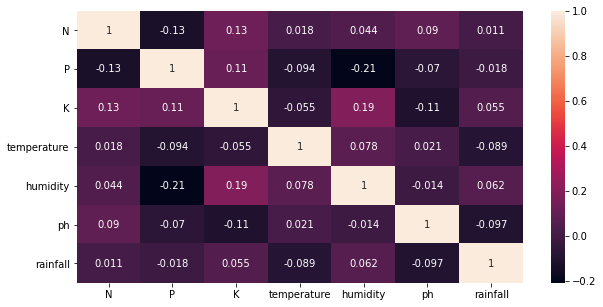

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.heatmap(df.corr(method ='kendall'),annot=True)

In [13]:
@interact
def summary(crops = list(df['label'].value_counts().index)):
    x = df[df['label'] == crops]
    print("---------------------------------------------")
    print("Statistics for Nitrogen")
    print("Minimum Nitrigen required :", x['N'].min())
    print("Average Nitrogen required :", x['N'].mean())
    print("Maximum Nitrogen required :", x['N'].max()) 
    print("---------------------------------------------")
    print("Statistics for Phosphorous")
    print("Minimum Phosphorous required :", x['P'].min())
    print("Average Phosphorous required :", x['P'].mean())
    print("Maximum Phosphorous required :", x['P'].max()) 
    print("---------------------------------------------")
    print("Statistics for Potassium")
    print("Minimum Potassium required :", x['K'].min())
    print("Average Potassium required :", x['K'].mean())
    print("Maximum Potassium required :", x['K'].max()) 
    print("---------------------------------------------")
    print("Statistics for Temperature")
    print("Minimum Temperature required : {0:.2f}".format(x['temperature'].min()))
    print("Average Temperature required : {0:.2f}".format(x['temperature'].mean()))
    print("Maximum Temperature required : {0:.2f}".format(x['temperature'].max()))
    print("---------------------------------------------")
    print("Statistics for Humidity")
    print("Minimum Humidity required : {0:.2f}".format(x['humidity'].min()))
    print("Average Humidity required : {0:.2f}".format(x['humidity'].mean()))
    print("Maximum Humidity required : {0:.2f}".format(x['humidity'].max()))
    print("---------------------------------------------")
    print("Statistics for PH")
    print("Minimum PH required : {0:.2f}".format(x['ph'].min()))
    print("Average PH required : {0:.2f}".format(x['ph'].mean()))
    print("Maximum PH required : {0:.2f}".format(x['ph'].max()))
    print("---------------------------------------------")
    print("Statistics for Rainfall")
    print("Minimum Rainfall required : {0:.2f}".format(x['rainfall'].min()))
    print("Average Rainfall required : {0:.2f}".format(x['rainfall'].mean()))
    print("Maximum Rainfall required : {0:.2f}".format(x['rainfall'].max()))

interactive(children=(Dropdown(description='crops', options=('rice', 'orange', 'papaya', 'apple', 'coconut', '…

In [14]:
@interact

def compare(conditions = ['N','P','K','temperature','ph','humidity','rainfall']):
    print("Crops which require greater than average", conditions,'\n')
    print(df[df[conditions] > df[conditions].mean()]['label'].unique())
    print("----------------------------------------------")
    print("Crops which require less than average", conditions,'\n')
    print(df[df[conditions] <= df[conditions].mean()]['label'].unique())

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'ph', 'humidit…

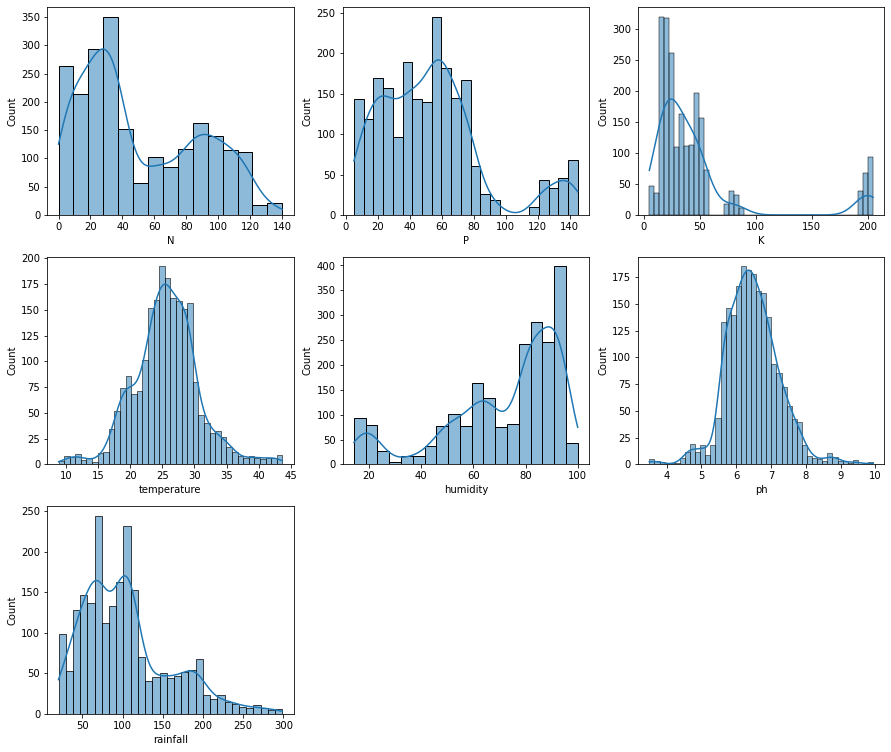

In [15]:
UnivariantAnalCol = df.columns[:-1]

plt.figure(figsize=(15,13))
i = 1
for column in UnivariantAnalCol:
    plt.subplot(3,3,i)
    sns.histplot(df[column],kde=True)
    i+=1
plt.show()

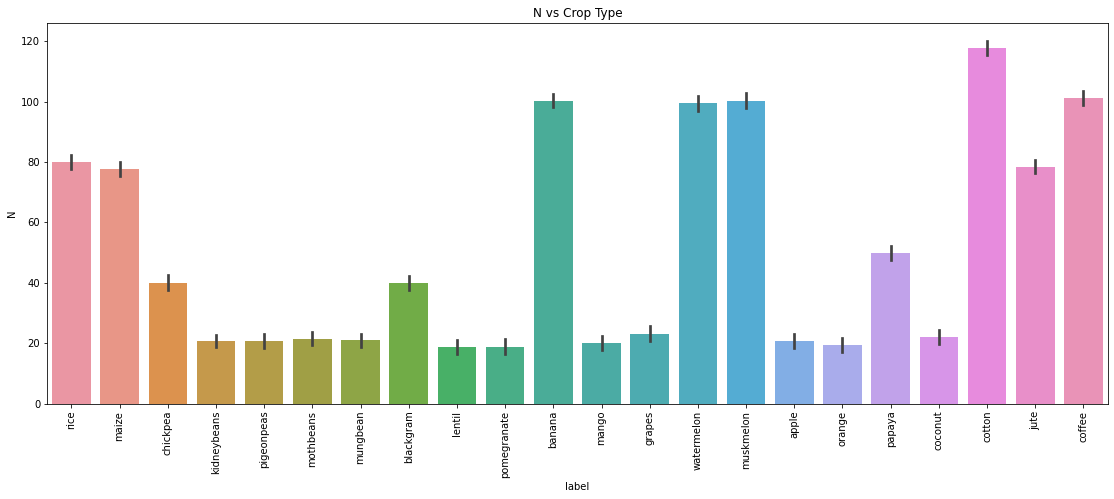

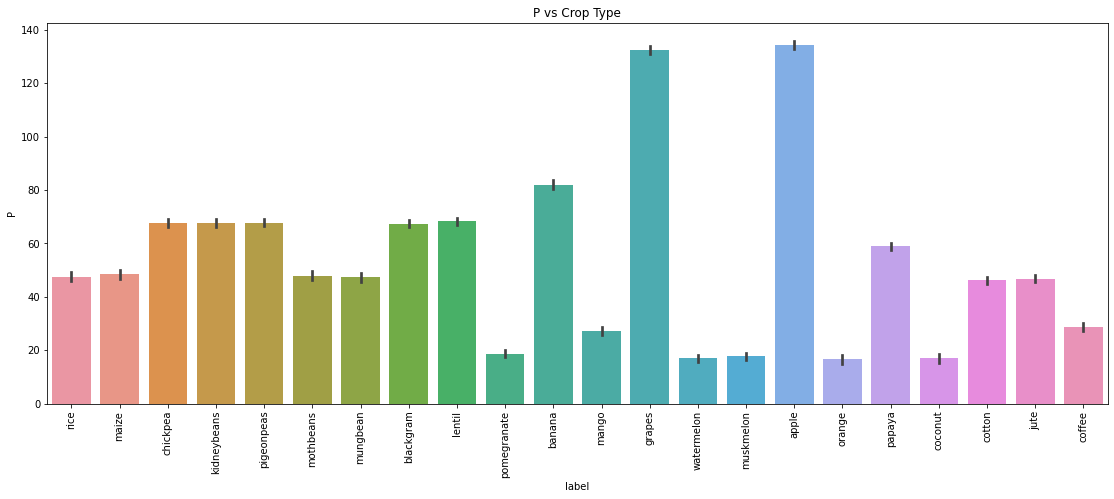

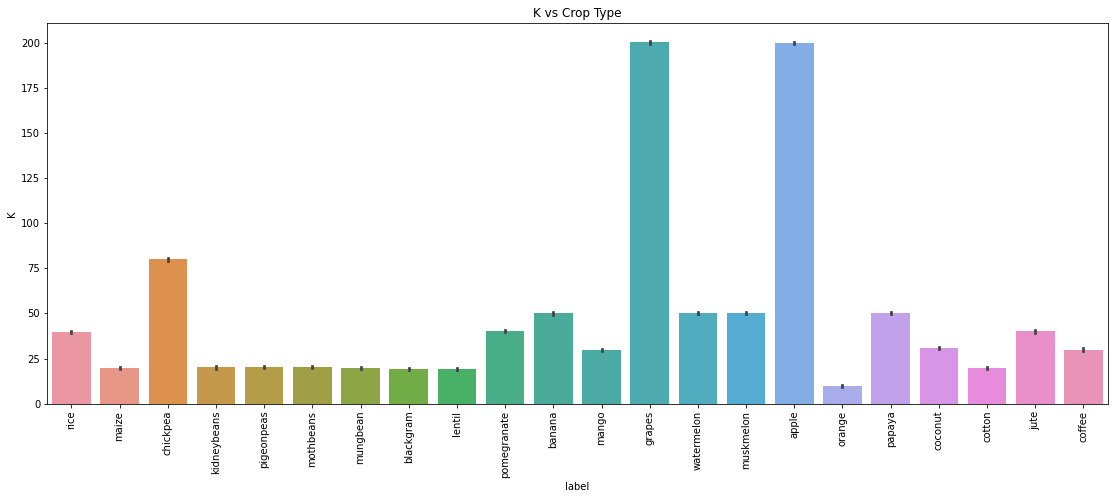

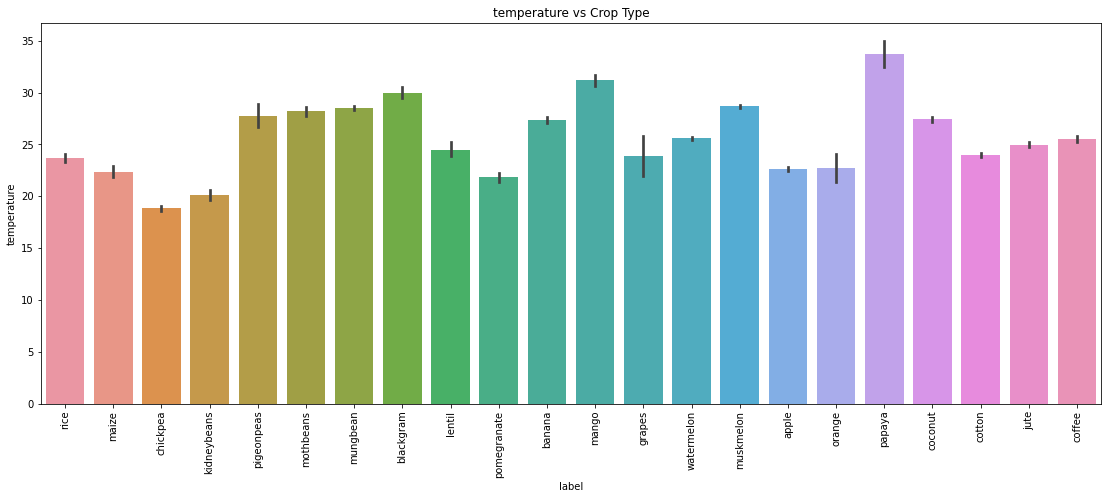

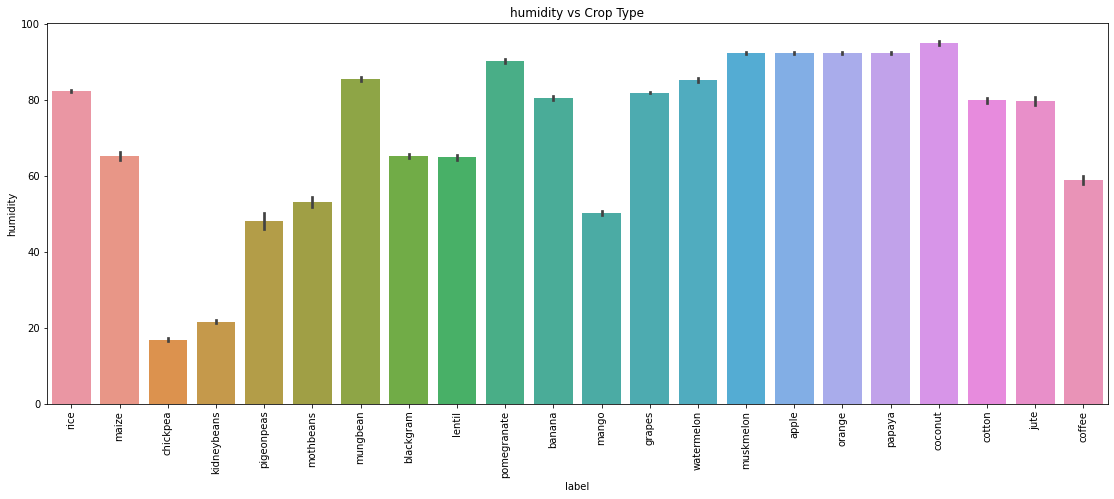

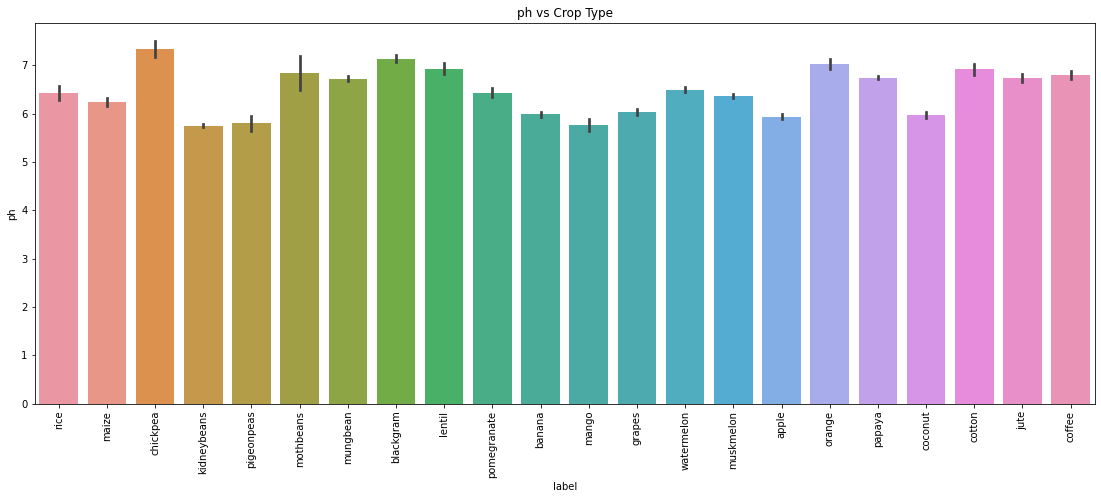

In [16]:
BivaraintAnalCol = df.columns[:-2]

for column in BivaraintAnalCol:
    plt.figure(figsize=(19,7))
    sns.barplot(x = "label", y = column, data = df)
    plt.xticks(rotation=90)
    plt.title(f"{column} vs Crop Type")
    plt.show()

In [17]:
df.head()
crops = df.groupby('label').mean()
crops

,N,P,K,temperature,humidity,ph,rainfall
label,,,,,,,
apple,20.80,134.22,199.89,22.630942,92.333383,5.929663,112.654779
banana,100.23,82.01,50.05,27.376798,80.358123,5.983893,104.626980
blackgram,40.02,67.47,19.24,29.973340,65.118426,7.133952,67.884151
chickpea,40.09,67.79,79.92,18.872847,16.860439,7.336957,80.058977
coconut,21.98,16.93,30.59,27.409892,94.844272,5.976562,175.686646
coffee,101.20,28.74,29.94,25.540477,58.869846,6.790308,158.066295
cotton,117.77,46.24,19.56,23.988958,79.843474,6.912675,80.398043
grapes,23.18,132.53,200.11,23.849575,81.875228,6.025937,69.611829
jute,78.40,46.86,39.99,24.958376,79.639864,6.732778,174.792798


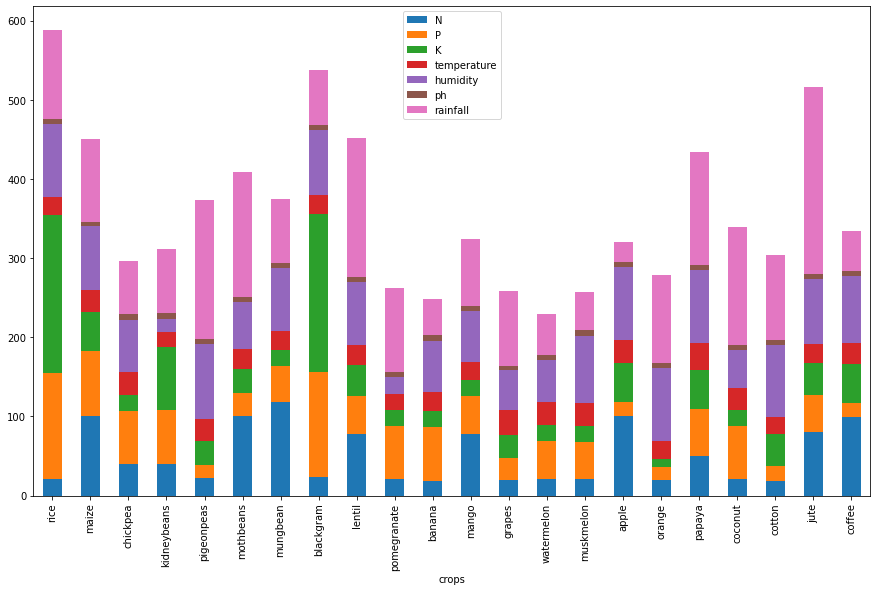

In [18]:
crops_list = df['label'].unique()
crops['crops'] = crops_list
crops.plot(x='crops', kind='bar', stacked=True,
        title='' , figsize=(15, 9));

## `4. Feature Selection`

In [19]:
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']
labels = df['label']

In [20]:
ML_models = []
Model_Accuracies = []

In [21]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

## `5. Modeling Classification algorithms`

### `I. Decision Tree Classifier`

           Actual    Predicted
2121       coffee       coffee
960   pomegranate  pomegranate
952   pomegranate  pomegranate
1958       cotton       cotton
681      mungbean     mungbean
...           ...          ...
1684       orange       orange
1477    muskmelon    muskmelon
851        lentil       lentil
370   kidneybeans   pigeonpeas
2010         jute         jute

[440 rows x 2 columns]
DecisionTrees's Accuracy is:  90.0
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.59      1.00      0.74        16
    chickpea       1.00      1.00      1.00        21
     coconut       0.91      1.00      0.95        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.74      0.93      0.83        28
 kidneybeans       0.00     

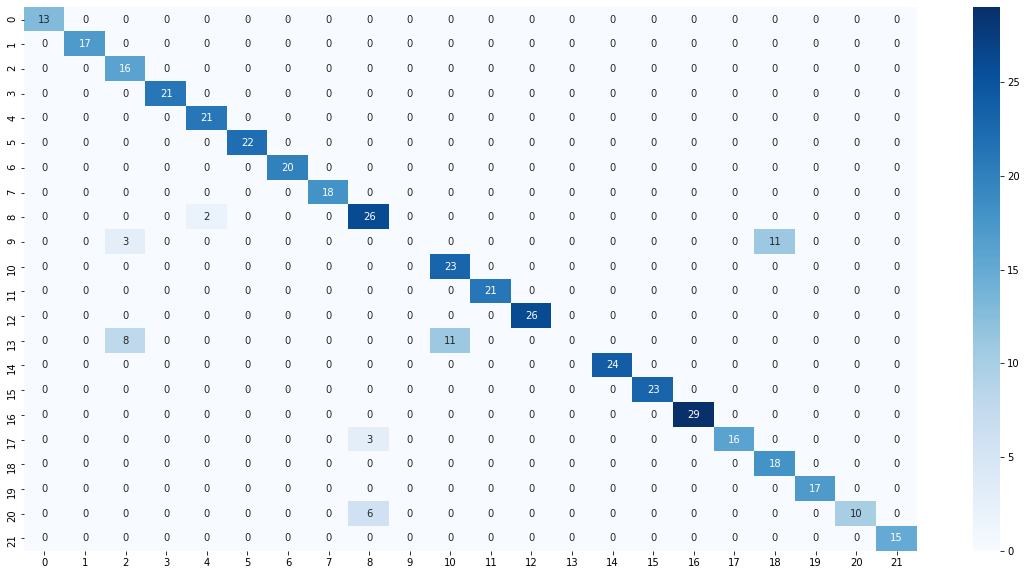

In [22]:
DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
Model_Accuracies.append(x*100)
ML_models.append('Decision Tree')

# Comparing Actual vs Predicted
DT_OutputDF = pd.DataFrame({'Actual': Ytest, 'Predicted': predicted_values}) #Comparing the accurracy  
print(DT_OutputDF) 
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))
plt.figure(figsize=(20,10))
sns.heatmap(confusion_matrix(Ytest,predicted_values), annot=True, cmap="Blues")
plt.show()

In [23]:
# Cross validation score for DecisionTree
score = cross_val_score(DecisionTree, features, target,cv=5)
score

array([0.93636364, 0.90909091, 0.91818182, 0.87045455, 0.93636364])

### `II. Gaussian Naive Bayes`

           Actual    Predicted
2121       coffee       coffee
960   pomegranate  pomegranate
952   pomegranate  pomegranate
1958       cotton       cotton
681      mungbean     mungbean
...           ...          ...
1684       orange       orange
1477    muskmelon    muskmelon
851        lentil       lentil
370   kidneybeans  kidneybeans
2010         jute         jute

[440 rows x 2 columns]
Naive Bayes's Accuracy is:  99.0909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       1.00      1.00      1.00        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.88      1.00      0.93        28
 kidneybeans      

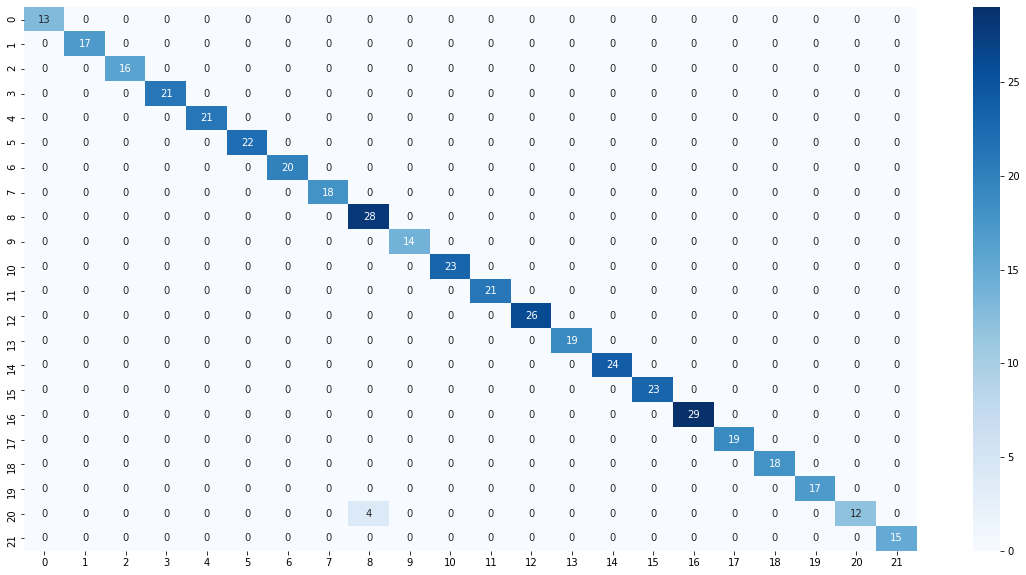

In [24]:
NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
Model_Accuracies.append(x*100)
ML_models.append('Naive Bayes')

NB_OutputDF = pd.DataFrame({'Actual': Ytest, 'Predicted': predicted_values}) #Comparing the accurracy  
print(NB_OutputDF) 
print("Naive Bayes's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))
plt.figure(figsize=(20,10))
sns.heatmap(confusion_matrix(Ytest,predicted_values), annot=True, cmap="Blues")
plt.show()

In [25]:
# Cross validation score (NaiveBayes)
score = cross_val_score(NaiveBayes,features,target,cv=5)
score

array([0.99772727, 0.99545455, 0.99545455, 0.99545455, 0.99090909])

### `(Hyperparameter Tuning) Finding the Best Value for Hyperparameter`

Accuracy at N = 1 is 0.990909090909091
Accuracy at N = 2 is 0.990909090909091
Accuracy at N = 3 is 0.990909090909091
Accuracy at N = 4 is 0.990909090909091
Accuracy at N = 5 is 0.990909090909091
Accuracy at N = 6 is 0.990909090909091
Accuracy at N = 7 is 0.990909090909091
Accuracy at N = 8 is 0.990909090909091
Accuracy at N = 9 is 0.990909090909091
Accuracy at N = 10 is 0.990909090909091
Accuracy at N = 11 is 0.990909090909091
Accuracy at N = 12 is 0.990909090909091
Accuracy at N = 13 is 0.990909090909091
Accuracy at N = 14 is 0.990909090909091
Accuracy at N = 15 is 0.990909090909091
Accuracy at N = 16 is 0.990909090909091
Accuracy at N = 17 is 0.990909090909091
Accuracy at N = 18 is 0.990909090909091
Accuracy at N = 19 is 0.990909090909091
Accuracy at N = 20 is 0.990909090909091
Accuracy at N = 21 is 0.990909090909091
Accuracy at N = 22 is 0.990909090909091
Accuracy at N = 23 is 0.990909090909091
Accuracy at N = 24 is 0.990909090909091
Accuracy at N = 25 is 0.990909090909091
Accuracy 

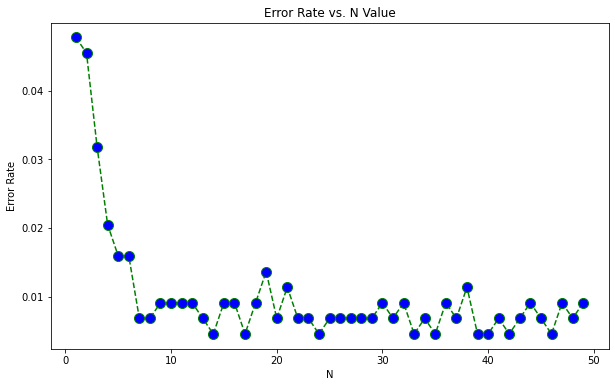

In [26]:
error_rate = []
for i in range(1, 50):
    pipeline = make_pipeline(StandardScaler(), RandomForestClassifier(n_estimators = i))
    pipeline.fit(Xtrain, Ytrain)
    predictions = pipeline.predict(Xtest)
    accuracy = accuracy_score(Ytest, predicted_values)
    print(f"Accuracy at N = {i} is {accuracy}")
    error_rate.append(np.mean(predictions != Ytest))

plt.figure(figsize=(10,6))
plt.plot(range(1,50),error_rate,color='green', linestyle='dashed', 
         marker='o',markerfacecolor='blue', markersize=10)
plt.title('Error Rate vs. N Value')
plt.xlabel('N')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at N =",error_rate.index(min(error_rate))+1)

### `III. Random Forest Classifier`

           Actual    Predicted
2121       coffee       coffee
960   pomegranate  pomegranate
952   pomegranate  pomegranate
1958       cotton       cotton
681      mungbean     mungbean
...           ...          ...
1684       orange       orange
1477    muskmelon    muskmelon
851        lentil       lentil
370   kidneybeans  kidneybeans
2010         jute         jute

[440 rows x 2 columns]
RF's Accuracy is:  0.990909090909091
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      1.00      0.97        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.90      1.00      0.95        28
 kidneybeans       1.00   

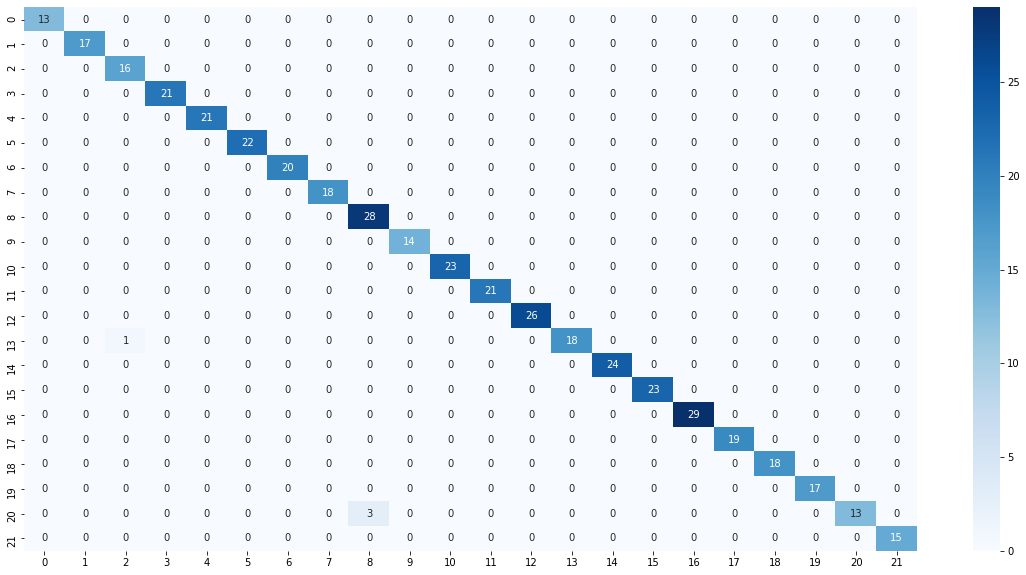

In [27]:
RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
Model_Accuracies.append(x*100)
ML_models.append('RF')
RF_OutputDF = pd.DataFrame({'Actual': Ytest, 'Predicted': predicted_values}) #Comparing the accurracy  
print(RF_OutputDF) 
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))
plt.figure(figsize=(20,10))
sns.heatmap(confusion_matrix(Ytest,predicted_values), annot=True, cmap="Blues")
plt.show()

In [28]:
# Cross validation score Random Forest
score = cross_val_score(RF,features,target,cv=5)
score

array([0.99772727, 0.99545455, 0.99772727, 0.99318182, 0.98863636])

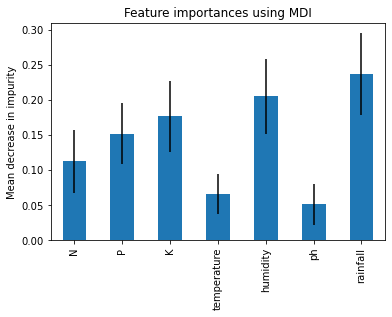

In [29]:
importances = RF.feature_importances_
labels = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
forest_importances = pd.Series(importances, index=labels)
std = np.std([tree.feature_importances_ for tree in RF.estimators_], axis=0)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.show()

> **`Potassium, Humidity, and Rainfall are found to be the most important features effecting the plant growth.`**

### `Data Processing (XgBoost classifier does not accept categorical values)`

In [30]:
ord_enc = OrdinalEncoder()
df["encodedLabel"] = ord_enc.fit_transform(df[["label"]])
df

,N,P,K,temperature,humidity,ph,rainfall,label,encodedLabel
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,20.0
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,20.0
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,20.0
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,20.0
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,20.0
...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,5.0
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,5.0
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,5.0
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,5.0


### `Feature Selection for XGBOOST`

In [31]:
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['encodedLabel']
labels = df['label']
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

### `IV. XGBoost Classifier`

      Actual  Predicted
2121     5.0          5
960     19.0         19
952     19.0         19
1958     6.0          6
681     14.0         14
...      ...        ...
1684    16.0         16
1477    15.0         15
851     10.0         10
370      9.0          9
2010     8.0          8

[440 rows x 2 columns]
XGBoost's Accuracy is:  99.31818181818181
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        13
         1.0       1.00      1.00      1.00        17
         2.0       1.00      1.00      1.00        16
         3.0       1.00      1.00      1.00        21
         4.0       1.00      1.00      1.00        21
         5.0       0.96      1.00      0.98        22
         6.0       1.00      1.00      1.00        20
         7.0       1.00      1.00      1.00        18
         8.0       1.00      0.93      0.96        28
         9.0       1.00      1.00      1.00        14
        10.0       0.96      1.00      0.98        

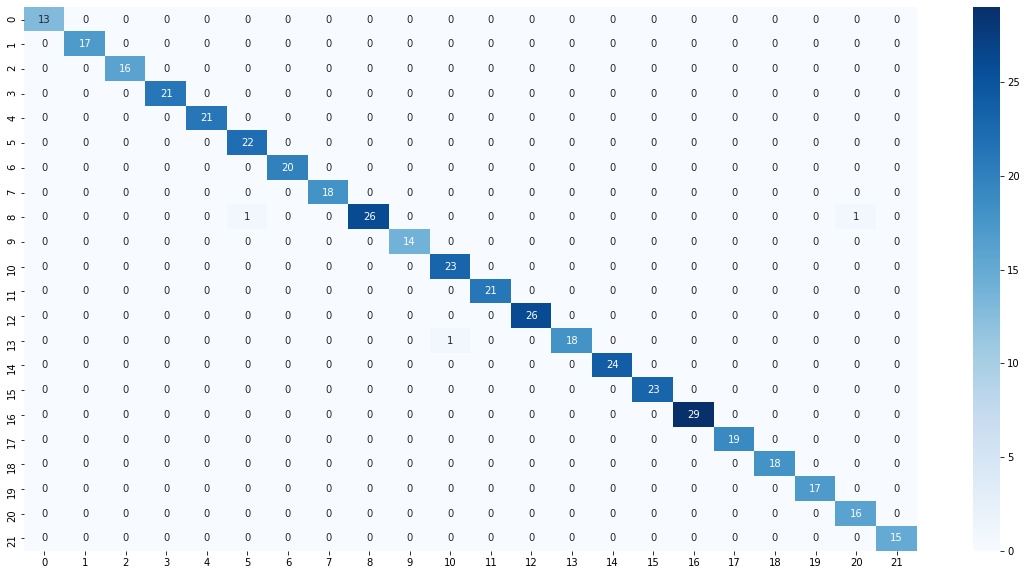

In [32]:
XB = xgb.XGBClassifier()
XB.fit(Xtrain,Ytrain)

predicted_values = XB.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
Model_Accuracies.append(x*100)
ML_models.append('XGBoost')
XGB_OutputDF = pd.DataFrame({'Actual': Ytest, 'Predicted': predicted_values}) #Comparing the accurracy  
print(XGB_OutputDF) 
print("XGBoost's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))
plt.figure(figsize=(20,10))
sns.heatmap(confusion_matrix(Ytest,predicted_values), annot=True, cmap="Blues")
plt.show()

In [33]:
# Cross validation score XGBoost
score = cross_val_score(XB,features,target,cv=5)
score

array([0.99318182, 0.99318182, 0.99318182, 0.99090909, 0.99090909])

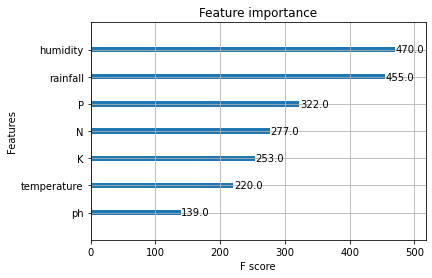

In [34]:
xgb.plot_importance(XB)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

> **`Potassium, Humidity, and Rainfall are found to be the most important features effecting the plant growth.`**

## `Accuracy Comparision`

In [35]:
pio.templates.default = "plotly_dark"


fig = go.Figure(go.Bar(
            x=Model_Accuracies,
            y=ML_models,
            orientation='h',
))

fig.update_layout(title="Accuracy Comparison")

fig.update_xaxes(title_text="Accuracy")
fig.update_yaxes(title_text="Algorithms")

fig.show()

## `6. Saving the ML model`

In [36]:
# Flattening and Saving the ML models
pickle.dump(RF, open("../FarmWiserApp/ml_models/CR_RF.pkl",'wb'))
pickle.dump(XB, open("../FarmWiserApp/ml_models/CR_XB.pkl",'wb'))
pickle.dump(NaiveBayes, open("../FarmWiserApp/ml_models/CR_NaiveBayes.pkl",'wb'))
pickle.dump(DecisionTree, open("../FarmWiserApp/ml_models/CR_DecisionTree.pkl",'wb'))